# Import The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Import The Dataset

In [2]:
df = pd.read_csv('winequality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Taking Care Of Missing Data

In [5]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [7]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818
free sulfur dioxide,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838,0.055463
total sulfur dioxide,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385
density,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356
sulphates,0.300225,0.225313,0.057564,-0.185716,0.395073,-0.188471,-0.275291,0.259432,0.191075,1.000000,-0.003261,0.038713


# Data Visualization

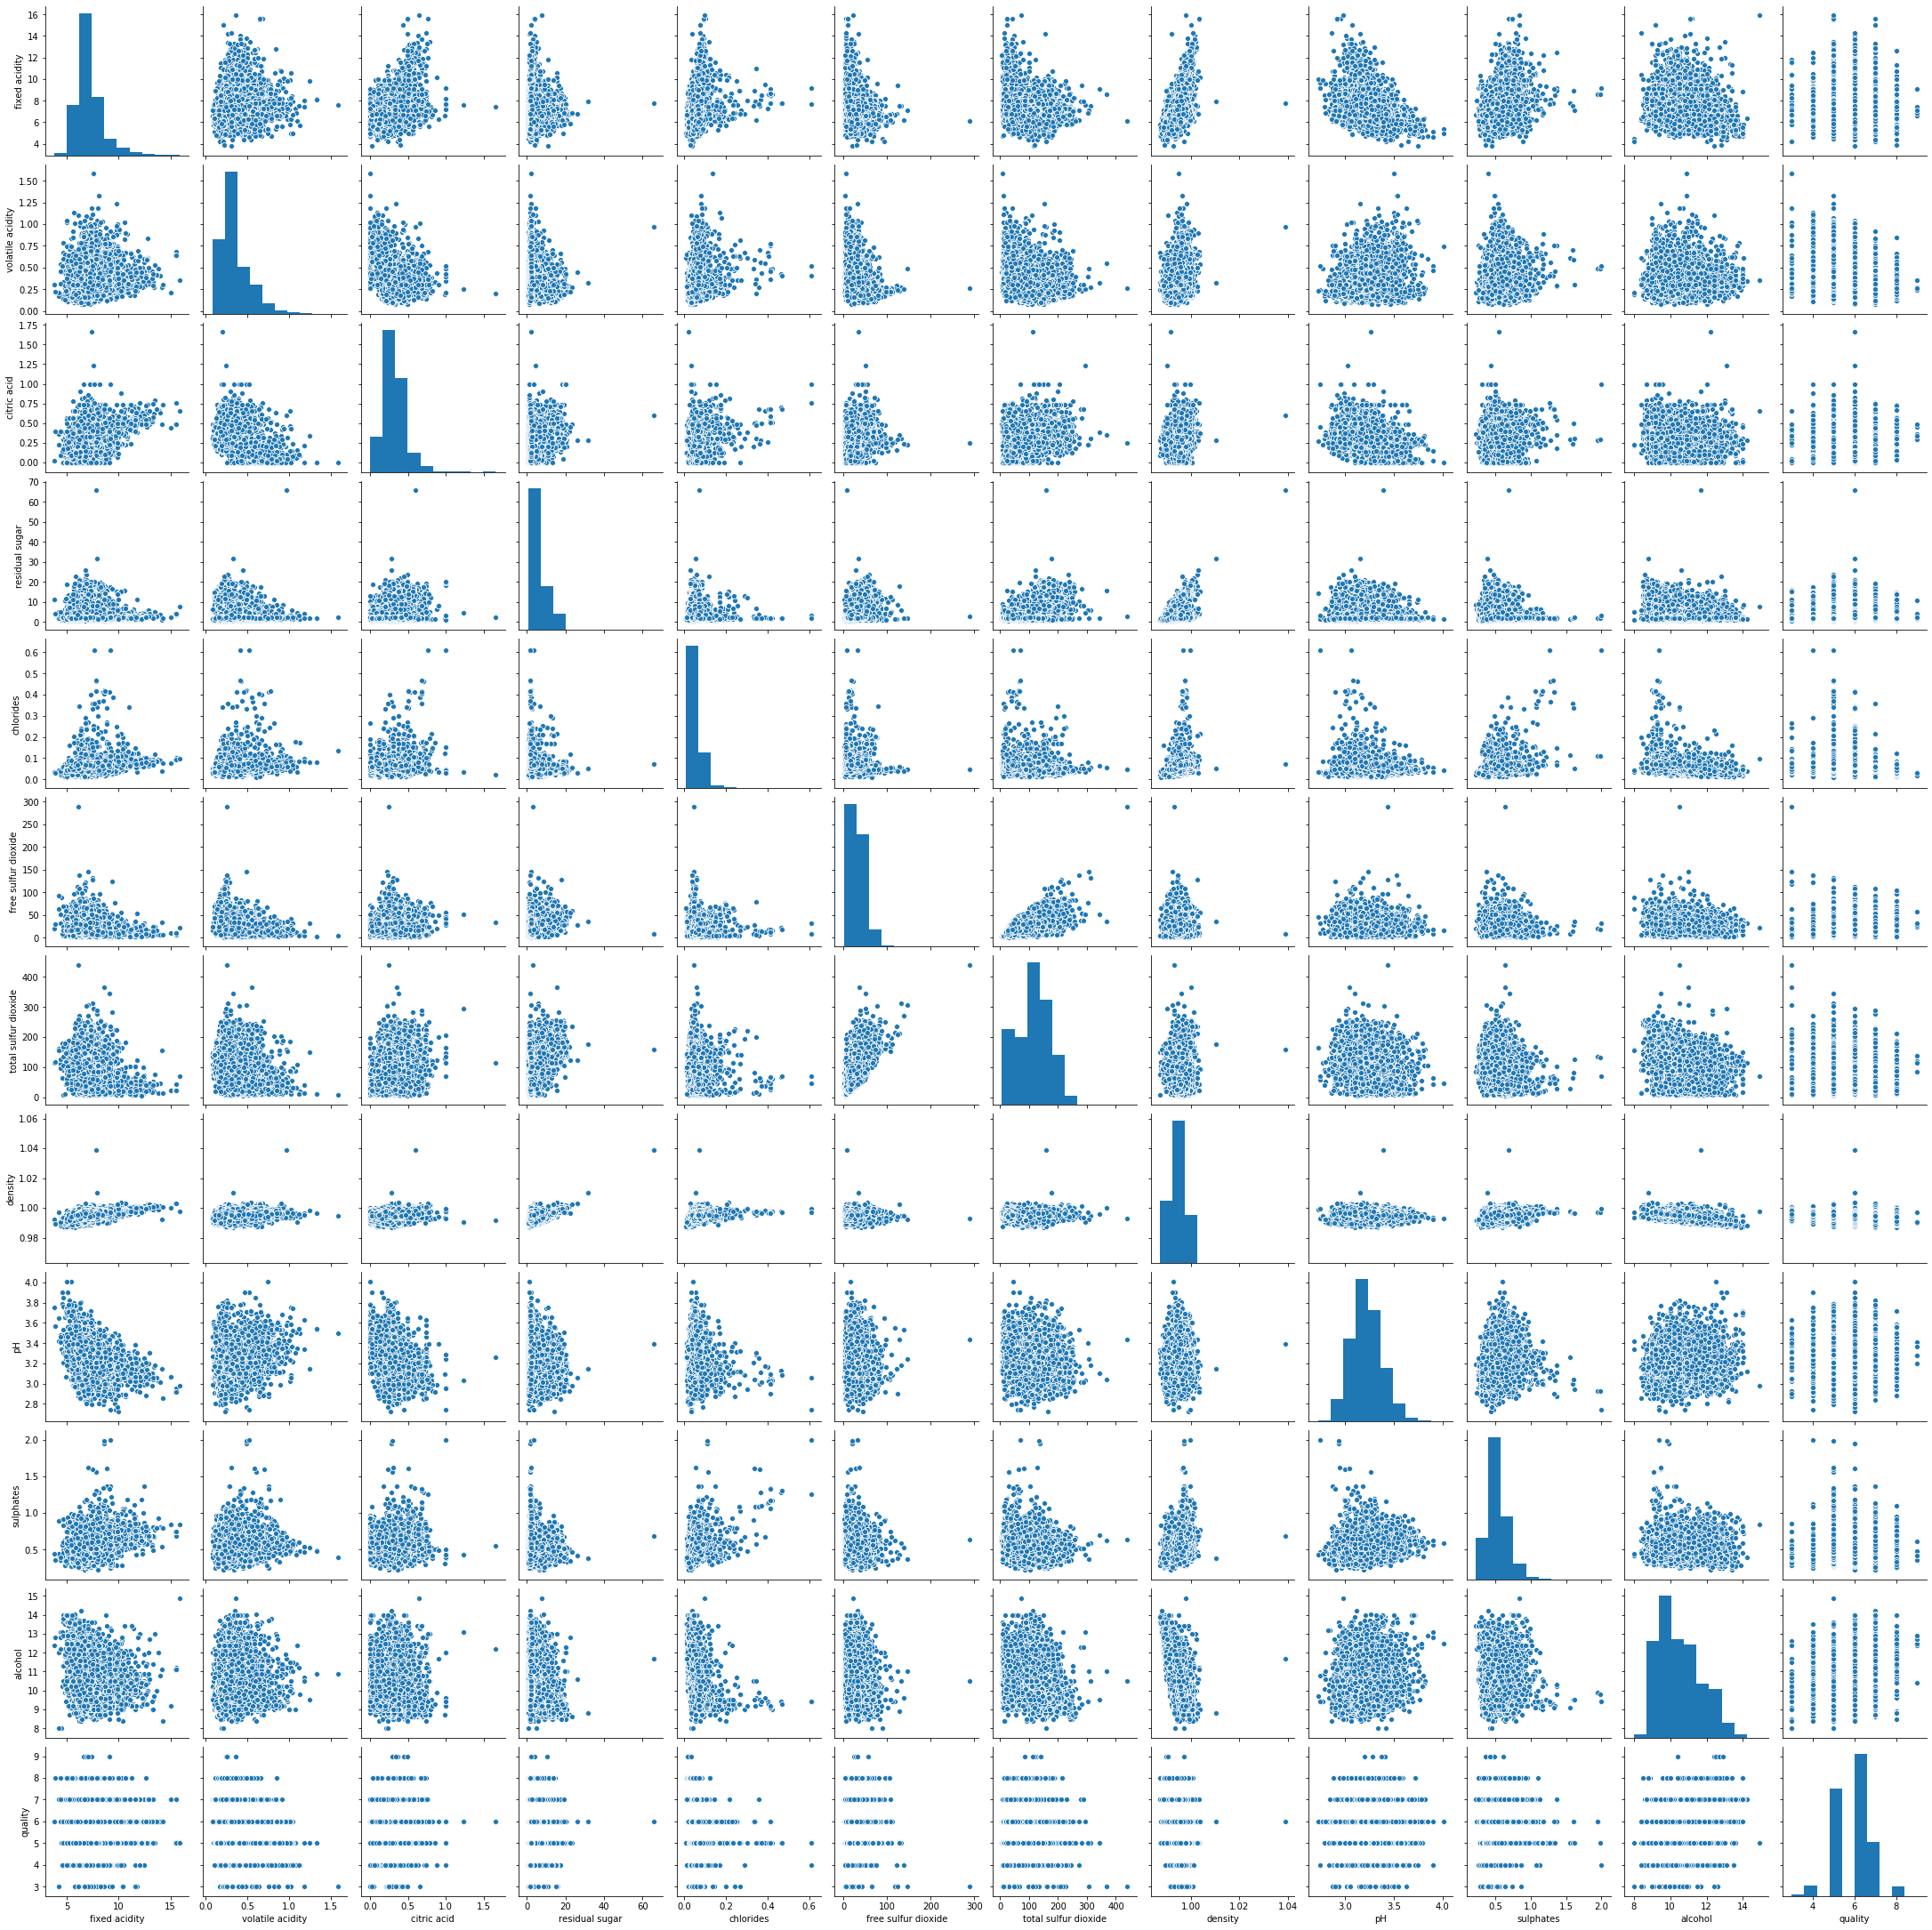

In [9]:
sns.pairplot(df)

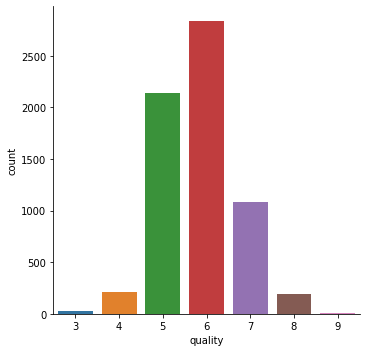

In [10]:
sns.catplot(x='quality', data = df, kind = 'count')

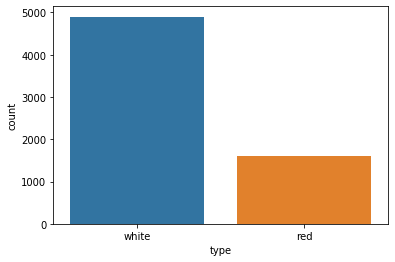

In [11]:
sns.countplot(df['type'])

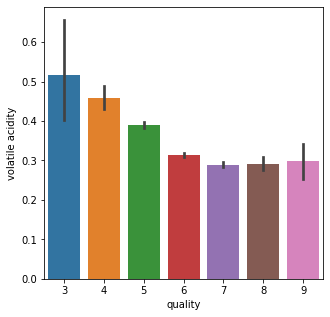

In [12]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = df)

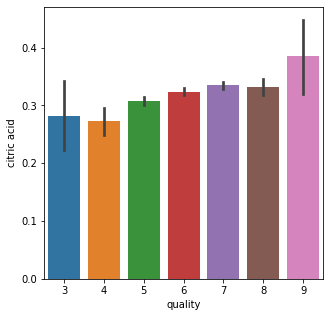

In [13]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = df)

# Correlation Matrix

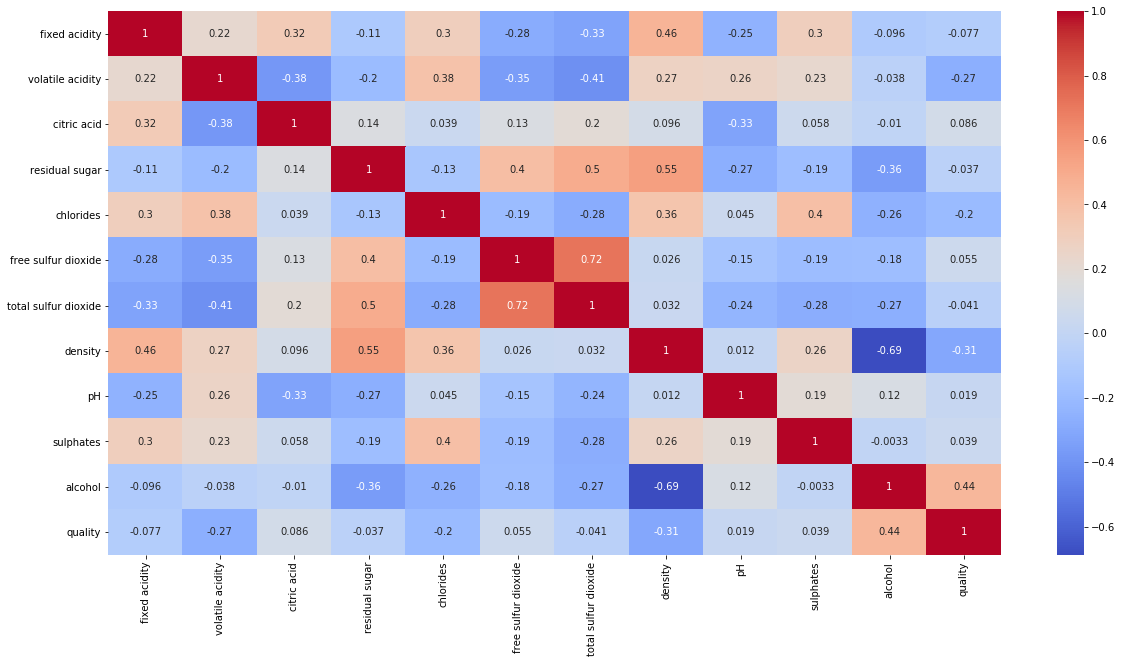

In [14]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')


# Splitting Dataset Into Dependent And Independent Variables And Labelling

In [15]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [16]:
df['type']=lb.fit_transform(df['type'])
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


white-1,red-0

In [17]:
x=df.drop('quality',axis=1)
x

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2


In [18]:
y=df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
y

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: quality, Length: 6497, dtype: int64

# Splitting Data Into Train And Test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [21]:
y.shape, y_train.shape, y_test.shape

((6497,), (5197,), (1300,))

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler #Feature scaling
from sklearn.pipeline import Pipeline #pipeline
model1=Pipeline([('rescale',StandardScaler()),('classifier',LogisticRegression())])
model1.fit(x_train,y_train)


Pipeline(steps=[('rescale', StandardScaler()),
                ('classifier', LogisticRegression())])

In [23]:
x_test_prediction = model1.predict(x_test)
acc1= accuracy_score(x_test_prediction, y_test)
acc1

0.8161538461538461

# SVM

In [24]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler#Feature scaling
from sklearn.pipeline import Pipeline #pipeline
model2=Pipeline([('rescale',StandardScaler()),('classifier',SVC(kernel='rbf'))])
model2.fit(x_train,y_train)

Pipeline(steps=[('rescale', StandardScaler()), ('classifier', SVC())])

In [25]:
x_test_prediction = model2.predict(x_test)
acc2= accuracy_score(x_test_prediction, y_test)
acc2

0.8292307692307692

# KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler#Feature scaling
from sklearn.pipeline import Pipeline # Pipeline
model3 = Pipeline([('rescale', StandardScaler()),('classifier', KNeighborsClassifier())])
model3.fit(x_train,y_train)


Pipeline(steps=[('rescale', StandardScaler()),
                ('classifier', KNeighborsClassifier())])

In [27]:
x_test_prediction = model3.predict(x_test)
acc3= accuracy_score(x_test_prediction, y_test)
acc3

0.8323076923076923

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler#Feature scaling
from sklearn.pipeline import Pipeline # Pipeline
model4 = Pipeline([('rescale', StandardScaler()),('classifier', DecisionTreeClassifier())])
model4.fit(x_train,y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('classifier', DecisionTreeClassifier())])

In [29]:
x_test_prediction = model4.predict(x_test)
acc4= accuracy_score(x_test_prediction, y_test)
acc4

0.8376923076923077

# Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler#Feature scaling
from sklearn.pipeline import Pipeline # Pipeline
model5= Pipeline([('rescale', StandardScaler()),('classifier', DecisionTreeClassifier())])
model5.fit(x_train,y_train)

Pipeline(steps=[('rescale', StandardScaler()),
                ('classifier', DecisionTreeClassifier())])

In [31]:
x_test_prediction = model5.predict(x_test)
acc5= accuracy_score(x_test_prediction, y_test)
acc5

0.8384615384615385

In [32]:
Accuracy={'logistic':acc1,'SVM':acc2,'KNN':acc3,'Decision Tree':acc4,'Random Forest':acc5}

<BarContainer object of 5 artists>

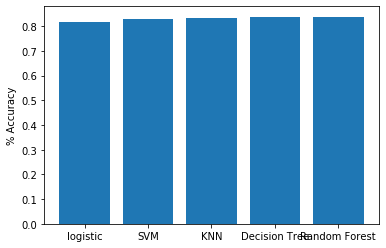

In [33]:
plt.ylabel('% Accuracy')
plt.bar(Accuracy.keys(),Accuracy.values())

In [34]:
max(Accuracy,key=Accuracy.get)

'Random Forest'

# Building a Predictive System

In [38]:
input_data=input().split()
if input_data[0]=='white':
    input_data[0]='1'
else:
    input_data[0]='0'
# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model5.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')


white 6.6 0.16 0.4 1.5 0.044 48 143 0.9912 3.54 0.52 12.4
[1]
Good Quality Wine
